In [1]:
import wrfhydropy
import os

In [2]:
model = wrfhydropy.Model('/home/docker/mount/wrf_hydro_nwm_public/trunk/NDHMS/',compiler='gfort',model_config='nwm_ana')
domain = wrfhydropy.Domain(domain_top_dir='/home/docker/mount/domain/example_case',domain_config='nwm_ana')

In [3]:
simulation = wrfhydropy.Simulation()

In [4]:
simulation.add(model)
simulation.add(domain)

/home/docker/miniconda3/lib/python3.6/site-packages/wrfhydropy-0.0.15.dev4-py3.6.egg/wrfhydropy/core/simulation.py:225: UserWarning: Model minor versions v5.1.0-alpha9
 do not match domain minor versions v5.1.0-alpha8


In [5]:
simulation.base_hydro_namelist['hydro_nlist']['output_channelbucket_influx'] = 0

In [6]:
exe_cmd = 'mpirun -np 4 ./wrf_hydro.exe'
job_24hr = wrfhydropy.Job(job_id='24hr',
                          exe_cmd = exe_cmd,
                          model_start_time = '2011-08-26',
                          model_end_time='2011-08-28',
                          restart_freq_hr=24,
                          output_freq_hr=24)
job_1hr = wrfhydropy.Job(job_id='1hr',
                         exe_cmd = exe_cmd,
                         model_start_time = '2011-08-28',
                         model_end_time='2011-08-29',
                         restart_freq_hr=1,
                         output_freq_hr=1)
for job in [job_24hr,job_1hr]:
    simulation.add(job)

In [8]:
os.mkdir('/home/docker/test_run')
os.chdir('/home/docker/test_run')
simulation.compose()

Composing simulation into directory:'/home/docker/test_run'
Getting domain files...
/home/docker/mount/domain/example_case/NWM/DOMAIN/nudgingParams.nc
/home/docker/mount/domain/example_case/NWM/RESTART/nudgingLastObs.2011-08-26_00:00:00.nc
Making job directories...
Validating job input files
24hr
1hr
Compiling model...
Model successfully compiled into /home/docker/test_run
Simulation successfully composed


In [9]:
simulation.run()


Running job 24hr: 
    Wall start time: 2018-09-13 18:06:37
    Model start time: 2011-08-26 00:00
    Model end time: 2011-08-28 00:00

Running job 1hr: 
    Wall start time: 2018-09-13 18:06:42
    Model start time: 2011-08-28 00:00
    Model end time: 2011-08-29 00:00


In [10]:
simulation.collect()

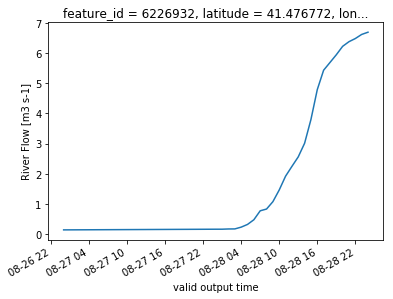

In [12]:
simulation.output.channel_rt.open(forecast=False).sel(feature_id=6226932).streamflow.plot()